In [5]:
import pandas as pd
import numpy as np
from IPython.display import display
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive
from sklearn import tree
from collections import Counter
import graphviz


In [6]:
df = pd.read_pickle("./TempData/preprocessed")
df.head()

,Unnamed: 0,text,label,tweet_length,has_user,has_hashtag,has_url,tidy_tweet,tidy_tweet_tokens,tokens_no_stop
0,0,These girls are the equivalent of the irritati...,racism,99,False,True,False,these girls equivalent irritating asian girls ...,"[these, girl, equivalent, irritate, asian, gir...","[girl, equivalent, irritate, asian, girl, coup..."
1,2,"Colin will save them. They're pretty blondes, ...",sexism,75,False,True,False,colin will save them they pretty blondes they ...,"[will, save, pretty, blonde, keep, tell]","[save, pretty, blonde, keep, tell]"
2,9,Stop saying dumb blondes with pretty faces as ...,sexism,94,False,True,False,stop saying dumb blondes with pretty faces nee...,"[stop, say, dumb, blonde, with, pretty, face, ...","[stop, say, dumb, blonde, pretty, face, need, ..."
3,10,Obviously natural blondes!! #mkr,sexism,32,False,True,False,obviously natural blondes,"[obviously, natural, blonde]","[obviously, natural, blonde]"
4,11,R u fucking kidding - catwalk - all that's mis...,sexism,65,False,True,False,fucking kidding catwalk that missing pole,"[fuck, kid, catwalk, that, miss, pole]","[fuck, kid, catwalk, miss, pole]"


In [7]:
flat_list = [item for sublist in df['tokens_no_stop'].values for item in sublist]
print("Total words:",len(flat_list))
vocab = list(set(flat_list))
print("Unique words:", len(vocab))


Total words: 45123
Unique words: 7033


## Data preparation

In [8]:
X = np.zeros((len(df['text']),len(vocab)))
y = np.zeros((len(df['text'])))

for idx, row in df.iterrows():
    for word in row['tokens_no_stop']:
        X[idx][vocab.index(word)] = 1
    if row['label'] not in ['none','normal','NOT']:
        y[idx] = 1
X    

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Decision tree

In [9]:
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=10)
clf = clf.fit(X, y)

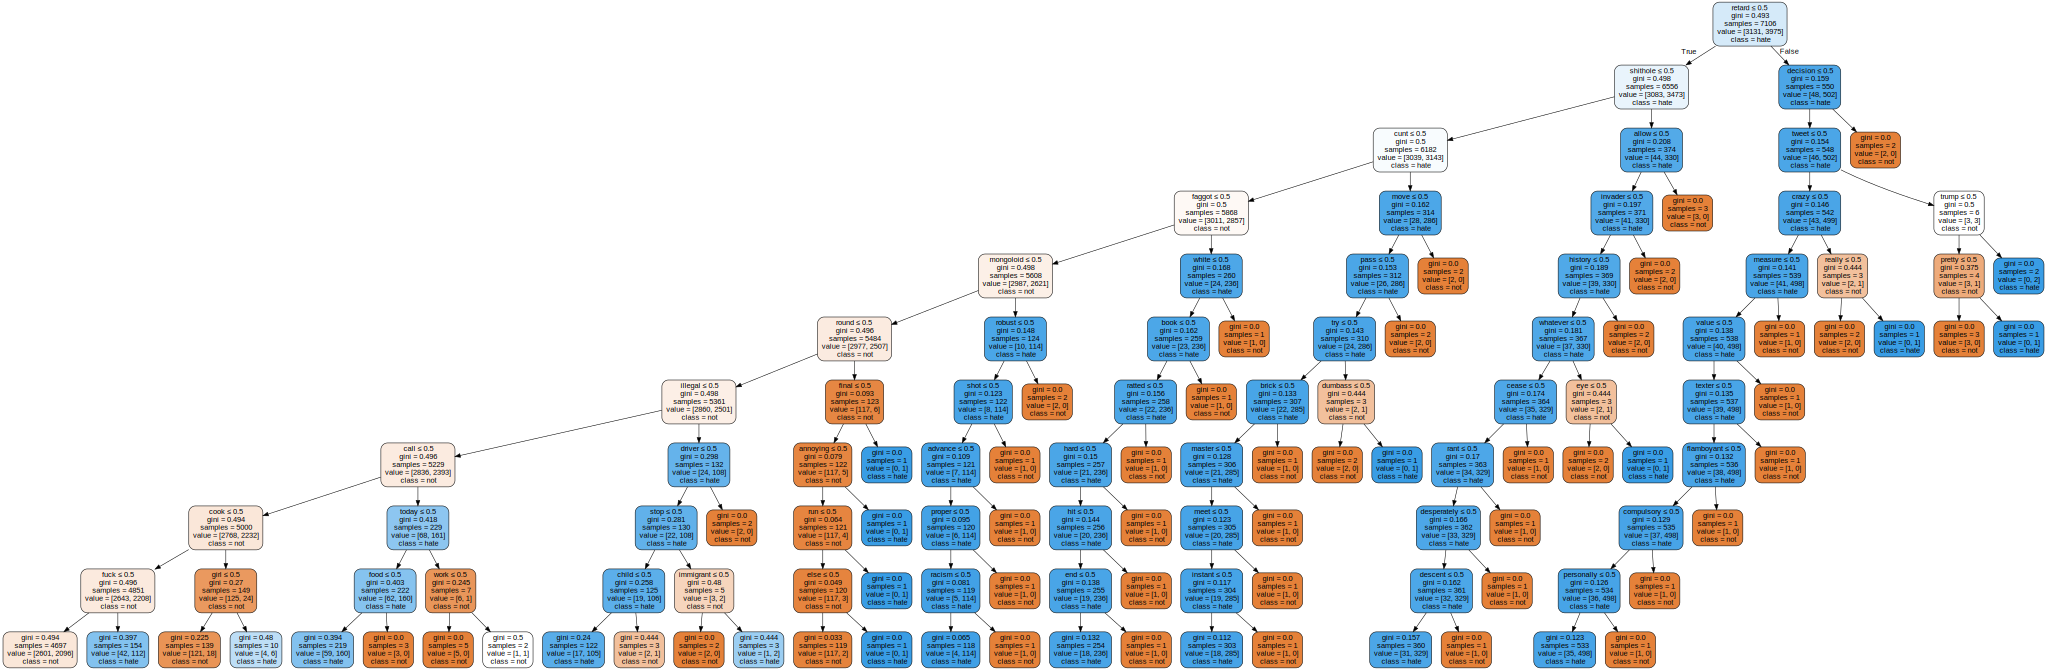

In [10]:
dot_data = tree.export_graphviz(clf, out_file=None,
    class_names=['not','hate'],
    feature_names=vocab,
    filled=True, rounded=True,  special_characters=True) 

graph = graphviz.Source(dot_data) 
graph.render("./twitter_data/tree") 

display(graphviz.Source(dot_data))  

## Save bag of words

In [11]:
a = pd.DataFrame(X, columns=vocab)
a.to_csv("./twitter_data/word_vector.csv")

## feature importance
_feature_importances_ attribute on the model can be used to get most important features. It gives the value for each feature, more the value more the importance. The top 20 important features are shown below.

In [12]:
importances = list(clf.feature_importances_)
feature_importances = [(feature, round(importance, 10)) for feature, importance in zip(vocab, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# print(feature_importances)
top_i = 0
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))
    if top_i == 20:
        break
    top_i += 1

Variable: retard               Importance: 0.1948069209
Variable: cunt                 Importance: 0.1402128714
Variable: shithole             Importance: 0.1290733482
Variable: faggot               Importance: 0.1260968514
Variable: mongoloid            Importance: 0.0678034039
Variable: round                Importance: 0.0549195569
Variable: illegal              Importance: 0.0438051947
Variable: call                 Importance: 0.0377537462
Variable: cook                 Importance: 0.0327247237
Variable: fuck                 Importance: 0.0308236817
Variable: allow                Importance: 0.0061627051
Variable: today                Importance: 0.0059310822
Variable: girl                 Importance: 0.0054053297
Variable: robust               Importance: 0.0044970317
Variable: pass                 Importance: 0.0044270409
Variable: decision             Importance: 0.0043768528
Variable: move                 Importance: 0.0043706455
Variable: history              Importance: 0.004